In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### lambda plot

In [17]:
df = pd.read_csv('compas_EO_smooth_discr_perc.csv')
df['MSE'] = df['RMSE']**2
df['log_lambda'] = np.log(df['lambda'])
#df['abs(1-DI)'] = abs(1-df['DI_alpha'])
#df['abs(1-DMR)'] = abs(1-df['DMR_gamma'])
df['abs(1-MLF)'] = abs(1-df['MLF_beta'])

df = df.sort_values(by=['log_lambda'])

/Users/liuxuwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


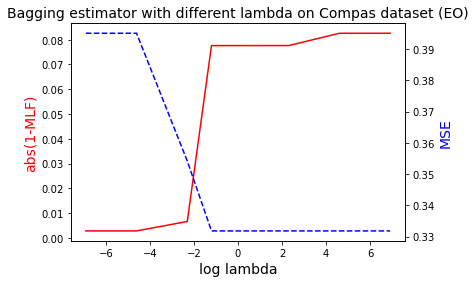

In [19]:
fig,ax = plt.subplots()
# make a plot
sns.lineplot(data=df, x='log_lambda', y='abs(1-MLF)', color='r')
# set x-axis label
ax.set_xlabel("log lambda",fontsize=14)
# set y-axis label
ax.set_ylabel("abs(1-MLF)",color="r",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
sns.lineplot(df.log_lambda, df.MSE,color="b",  linestyle='--')
ax2.set_ylabel("MSE",color="b",fontsize=14)
plt.title('Bagging estimator with different lambda on Compas dataset (EO)',fontsize=14)
plt.show()

### Scatter plot

In [23]:
df_basic = pd.read_csv('compas_EO_basic_estimators.csv')
df_hardt = pd.read_csv('compas_EO_hardt.csv')
df_agarwal = pd.read_csv('compas_EO_agrwal.csv')
df_combine = pd.read_csv('compas_EO_smooth_discr_perc.csv')
#df_grid = pd.read_csv('compas_LDM_discr_grid.csv')
#df_discr = pd.read_csv('german_LDM_discr_perc.csv')

df_basic['MSE'] = df_basic['RMSE']**2
df_basic['abs(1-MLF)'] = abs(1-df_basic['MLF_beta'])

df_agarwal['MSE'] = df_agarwal['RMSE']**2
df_agarwal['abs(1-MLF)'] = abs(1-df_agarwal['MLF_beta'])

df_hardt['MSE'] = df_hardt['RMSE']**2
df_hardt['abs(1-MLF)'] = abs(1-df_hardt['MLF_beta'])

df_combine['MSE'] = df_combine['RMSE']**2
df_combine['log_lambda'] = np.log(df_combine['lambda'])
df_combine['abs(1-MLF)'] = abs(1-df_combine['MLF_beta'])
df_combine = df_combine.sort_values(by=['log_lambda'])

# df_grid['MSE'] = df_grid['RMSE']**2
# df_grid['log_lambda'] = np.log(df_grid['lambda'])
# df_grid['abs(1-DI)'] = abs(1-df_grid['DI_alpha'])
# df_grid = df_grid.sort_values(by=['log_lambda'])

# df_discr['MSE'] = df_discr['RMSE']**2
# df_discr['log_lambda'] = np.log(df_discr['lambda'])
# df_discr['abs(1-DMR)'] = abs(1-df_discr['DMR_gamma'])
# df_discr = df_discr.sort_values(by=['log_lambda'])

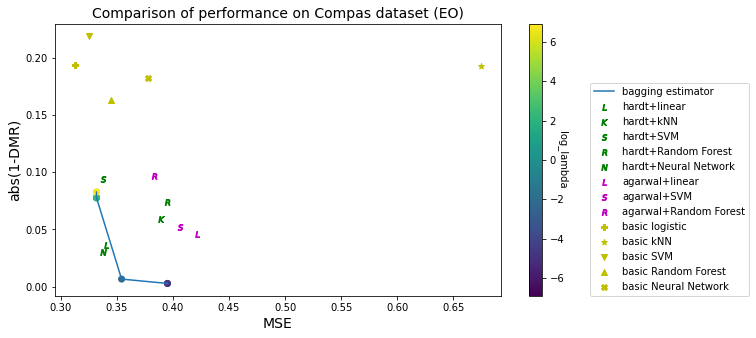

In [24]:
plt.figure(figsize=(10,5))
#combined predictor
plt.scatter(df_combine['MSE'], df_combine['abs(1-MLF)'], c=df_combine['log_lambda'])
plt.plot(df_combine['MSE'], df_combine['abs(1-MLF)'], label='bagging estimator')
cbar = plt.colorbar()
cbar.set_label('log_lambda',rotation= -90, fontsize=10)

#grid combined predictor
# plt.scatter(df_grid['MSE'], df_grid['abs(1-DI)'], c=df_grid['log_lambda'])
# plt.plot(df_grid['MSE'], df_grid['abs(1-DI)'], label='combined estimator with brut force')

# #grid combined predictor
# plt.scatter(df_discr['MSE'], df_discr['abs(1-DMR)'], c=df_discr['log_lambda'])
# plt.plot(df_discr['MSE'], df_discr['abs(1-DMR)'], label='combined estimator with discret test')
#cbar = plt.colorbar()
#cbar.set_label('log_lambda',rotation= -90, fontsize=10)

#hardt predictors
plt.scatter(df_hardt.loc[0,'MSE'], df_hardt.loc[0,'abs(1-MLF)'], marker='$L$', c='g', label='hardt+'+df_hardt.loc[0,'estimator'])
plt.scatter(df_hardt.loc[1,'MSE'], df_hardt.loc[1,'abs(1-MLF)'], marker='$K$', c='g',label='hardt+'+df_hardt.loc[1,'estimator'])
plt.scatter(df_hardt.loc[2,'MSE'], df_hardt.loc[2,'abs(1-MLF)'], marker='$S$', c='g',label='hardt+'+df_hardt.loc[2,'estimator'])
plt.scatter(df_hardt.loc[3,'MSE'], df_hardt.loc[3,'abs(1-MLF)'], marker='$R$', c='g',label='hardt+'+df_hardt.loc[3,'estimator'])
plt.scatter(df_hardt.loc[4,'MSE'], df_hardt.loc[4,'abs(1-MLF)'], marker='$N$', c='g',label='hardt+'+df_hardt.loc[4,'estimator'])

#agarwal predictors
plt.scatter(df_agarwal.loc[0,'MSE'], df_agarwal.loc[0,'abs(1-MLF)'], marker='$L$', c='m', label='agarwal+'+df_agarwal.loc[0,'estimator'])
plt.scatter(df_agarwal.loc[1,'MSE'], df_agarwal.loc[1,'abs(1-MLF)'], marker='$S$', c='m',label='agarwal+'+df_agarwal.loc[1,'estimator'])
plt.scatter(df_agarwal.loc[2,'MSE'], df_agarwal.loc[2,'abs(1-MLF)'], marker='$R$', c='m',label='agarwal+'+df_agarwal.loc[2,'estimator'])

#basic predictors
plt.scatter(df_basic.loc[0,'MSE'], df_basic.loc[0,'abs(1-MLF)'], marker='P', c='y', label='basic '+df_basic.loc[0,'estimator'])
plt.scatter(df_basic.loc[1,'MSE'], df_basic.loc[1,'abs(1-MLF)'], marker='*', c='y',label='basic '+df_basic.loc[1,'estimator'])
plt.scatter(df_basic.loc[2,'MSE'], df_basic.loc[2,'abs(1-MLF)'], marker='v', c='y',label='basic '+df_basic.loc[2,'estimator'])
plt.scatter(df_basic.loc[3,'MSE'], df_basic.loc[3,'abs(1-MLF)'], marker='^', c='y',label='basic '+df_basic.loc[3,'estimator'])
plt.scatter(df_basic.loc[4,'MSE'], df_basic.loc[4,'abs(1-MLF)'], marker='X', c='y',label='basic '+df_basic.loc[4,'estimator'])


plt.ylabel('abs(1-DMR)',fontsize=14)
plt.xlabel('MSE',fontsize=14)
plt.legend(loc=(1.2,0))
plt.title('Comparison of performance on Compas dataset (EO)',fontsize=14);

### Test 

In [20]:
df_basic = pd.read_csv('test_adult_DP_basic_estimators.csv')
df_hardt = pd.read_csv('adult_DP_hardt.csv')
df_agarwal = pd.read_csv('adult_DP_agarwal.csv')

df_discr_smooth_entro = pd.read_csv('test_adult_DP_smooth+entro.csv')
df_smooth_smooth_entro = pd.read_csv('test_adult_DP_smooth_smooth+entro.csv')

df_discr_KL_entro = pd.read_csv('test_adult_DP_KL+entro.csv')
df_smooth_KL_entro = pd.read_csv('test_adult_DP_smooth_KL+entro.csv')

df_discr_smooth_discrperc = pd.read_csv('test_adult_DP_smooth+discrperc.csv')
df_smooth_smooth_discrperc = pd.read_csv('test_adult_DP_smooth_smooth+discrperc.csv')

df_discr_KL_discrperc = pd.read_csv('test_adult_DP_KL+discrperc.csv')
df_smooth_KL_discrperc = pd.read_csv('test_adult_DP_smooth_KL+discrperc.csv')


df_basic['MSE'] = df_basic['RMSE']**2
df_basic['abs(1-DI)'] = abs(1-df_basic['DI_alpha'])

df_agarwal['MSE'] = df_agarwal['RMSE']**2
df_agarwal['abs(1-DI)'] = abs(1-df_agarwal['DI_alpha'])

df_hardt['MSE'] = df_hardt['RMSE']**2
df_hardt['abs(1-DI)'] = abs(1-df_hardt['DI_alpha'])

df_discr_smooth_entro['MSE'] = df_discr_smooth_entro['RMSE']**2
df_discr_smooth_entro['log_lambda'] = np.log(df_discr_smooth_entro['lambda'])
df_discr_smooth_entro['abs(1-DI)'] = abs(1-df_discr_smooth_entro['DI_alpha'])
df_discr_smooth_entro = df_discr_smooth_entro.sort_values(by=['log_lambda'])

df_smooth_smooth_entro['MSE'] = df_smooth_smooth_entro['RMSE']**2
df_smooth_smooth_entro['log_lambda'] = np.log(df_smooth_smooth_entro['lambda'])
df_smooth_smooth_entro['abs(1-DI)'] = abs(1-df_smooth_smooth_entro['DI_alpha'])
df_smooth_smooth_entro = df_smooth_smooth_entro.sort_values(by=['log_lambda'])

df_discr_KL_entro['MSE'] = df_discr_KL_entro['RMSE']**2
df_discr_KL_entro['log_lambda'] = np.log(df_discr_KL_entro['lambda'])
df_discr_KL_entro['abs(1-DI)'] = abs(1-df_discr_KL_entro['DI_alpha'])
df_discr_KL_entro = df_discr_KL_entro.sort_values(by=['log_lambda'])

df_smooth_KL_entro['MSE'] = df_smooth_KL_entro['RMSE']**2
df_smooth_KL_entro['log_lambda'] = np.log(df_smooth_KL_entro['lambda'])
df_smooth_KL_entro['abs(1-DI)'] = abs(1-df_smooth_KL_entro['DI_alpha'])
df_smooth_KL_entro = df_smooth_KL_entro.sort_values(by=['log_lambda'])

df_discr_smooth_discrperc['MSE'] = df_discr_smooth_discrperc['RMSE']**2
df_discr_smooth_discrperc['log_lambda'] = np.log(df_discr_smooth_discrperc['lambda'])
df_discr_smooth_discrperc['abs(1-DI)'] = abs(1-df_discr_smooth_discrperc['DI_alpha'])
df_discr_smooth_discrperc = df_discr_smooth_discrperc.sort_values(by=['log_lambda'])

df_smooth_smooth_discrperc['MSE'] = df_smooth_smooth_discrperc['RMSE']**2
df_smooth_smooth_discrperc['log_lambda'] = np.log(df_smooth_smooth_discrperc['lambda'])
df_smooth_smooth_discrperc['abs(1-DI)'] = abs(1-df_smooth_smooth_discrperc['DI_alpha'])
df_smooth_smooth_discrperc = df_smooth_smooth_discrperc.sort_values(by=['log_lambda'])

df_discr_KL_discrperc['MSE'] = df_discr_KL_discrperc['RMSE']**2
df_discr_KL_discrperc['log_lambda'] = np.log(df_discr_KL_discrperc['lambda'])
df_discr_KL_discrperc['abs(1-DI)'] = abs(1-df_discr_KL_discrperc['DI_alpha'])
df_discr_KL_discrperc = df_discr_KL_discrperc.sort_values(by=['log_lambda'])

df_smooth_KL_discrperc['MSE'] = df_smooth_KL_discrperc['RMSE']**2
df_smooth_KL_discrperc['log_lambda'] = np.log(df_smooth_KL_discrperc['lambda'])
df_smooth_KL_discrperc['abs(1-DI)'] = abs(1-df_smooth_KL_discrperc['DI_alpha'])
df_smooth_KL_discrperc = df_smooth_KL_discrperc.sort_values(by=['log_lambda'])

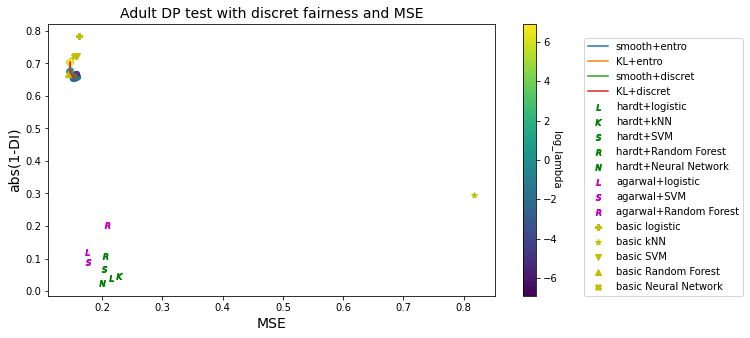

In [21]:
plt.figure(figsize=(10,5))
#combined predictor
plt.scatter(df_discr_smooth_entro['MSE'], df_discr_smooth_entro['abs(1-DI)'], c=df_discr_smooth_entro['log_lambda'])
plt.plot(df_discr_smooth_entro['MSE'], df_discr_smooth_entro['abs(1-DI)'], label='smooth+entro')
cbar = plt.colorbar()
cbar.set_label('log_lambda',rotation= -90, fontsize=10)

plt.scatter(df_discr_KL_entro['MSE'], df_discr_KL_entro['abs(1-DI)'], c=df_discr_KL_entro['log_lambda'])
plt.plot(df_discr_KL_entro['MSE'], df_discr_KL_entro['abs(1-DI)'], label='KL+entro')

plt.scatter(df_discr_smooth_discrperc['MSE'], df_discr_smooth_discrperc['abs(1-DI)'], c=df_discr_smooth_discrperc['log_lambda'])
plt.plot(df_discr_smooth_discrperc['MSE'], df_discr_smooth_discrperc['abs(1-DI)'], label='smooth+discret')

plt.scatter(df_discr_KL_discrperc['MSE'], df_discr_KL_discrperc['abs(1-DI)'], c=df_discr_KL_discrperc['log_lambda'])
plt.plot(df_discr_KL_discrperc['MSE'], df_discr_KL_discrperc['abs(1-DI)'], label='KL+discret')

#hardt predictors
plt.scatter(df_hardt.loc[0,'MSE'], df_hardt.loc[0,'abs(1-DI)'], marker='$L$', c='g', label='hardt+'+df_hardt.loc[0,'estimator'])
plt.scatter(df_hardt.loc[1,'MSE'], df_hardt.loc[1,'abs(1-DI)'], marker='$K$', c='g',label='hardt+'+df_hardt.loc[1,'estimator'])
plt.scatter(df_hardt.loc[2,'MSE'], df_hardt.loc[2,'abs(1-DI)'], marker='$S$', c='g',label='hardt+'+df_hardt.loc[2,'estimator'])
plt.scatter(df_hardt.loc[3,'MSE'], df_hardt.loc[3,'abs(1-DI)'], marker='$R$', c='g',label='hardt+'+df_hardt.loc[3,'estimator'])
plt.scatter(df_hardt.loc[4,'MSE'], df_hardt.loc[4,'abs(1-DI)'], marker='$N$', c='g',label='hardt+'+df_hardt.loc[4,'estimator'])

#agarwal predictors
plt.scatter(df_agarwal.loc[0,'MSE'], df_agarwal.loc[0,'abs(1-DI)'], marker='$L$', c='m', label='agarwal+'+df_agarwal.loc[0,'estimator'])
plt.scatter(df_agarwal.loc[1,'MSE'], df_agarwal.loc[1,'abs(1-DI)'], marker='$S$', c='m',label='agarwal+'+df_agarwal.loc[1,'estimator'])
plt.scatter(df_agarwal.loc[2,'MSE'], df_agarwal.loc[2,'abs(1-DI)'], marker='$R$', c='m',label='agarwal+'+df_agarwal.loc[2,'estimator'])

#basic predictors
plt.scatter(df_basic.loc[0,'MSE'], df_basic.loc[0,'abs(1-DI)'], marker='P', c='y', label='basic '+df_basic.loc[0,'estimator'])
plt.scatter(df_basic.loc[1,'MSE'], df_basic.loc[1,'abs(1-DI)'], marker='*', c='y',label='basic '+df_basic.loc[1,'estimator'])
plt.scatter(df_basic.loc[2,'MSE'], df_basic.loc[2,'abs(1-DI)'], marker='v', c='y',label='basic '+df_basic.loc[2,'estimator'])
plt.scatter(df_basic.loc[3,'MSE'], df_basic.loc[3,'abs(1-DI)'], marker='^', c='y',label='basic '+df_basic.loc[3,'estimator'])
plt.scatter(df_basic.loc[4,'MSE'], df_basic.loc[4,'abs(1-DI)'], marker='X', c='y',label='basic '+df_basic.loc[4,'estimator'])


plt.ylabel('abs(1-DI)',fontsize=14)
plt.xlabel('MSE',fontsize=14)
plt.legend(loc=(1.2,0))
plt.title('Adult DP test with discret fairness and MSE',fontsize=14);

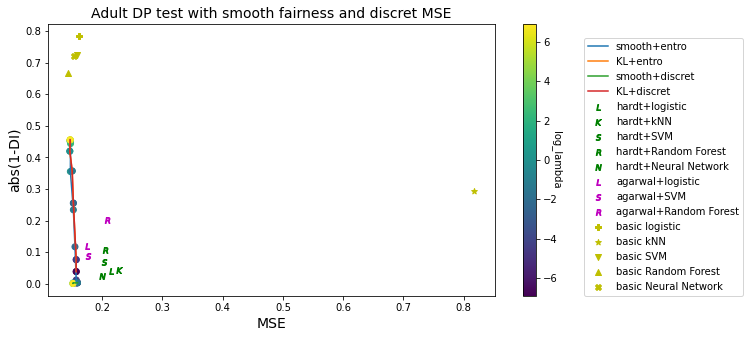

In [22]:
plt.figure(figsize=(10,5))
#combined predictor
plt.scatter(df_smooth_smooth_entro['MSE'], df_smooth_smooth_entro['abs(1-DI)'], c=df_smooth_smooth_entro['log_lambda'])
plt.plot(df_smooth_smooth_entro['MSE'], df_smooth_smooth_entro['abs(1-DI)'], label='smooth+entro')
cbar = plt.colorbar()
cbar.set_label('log_lambda',rotation= -90, fontsize=10)

plt.scatter(df_smooth_KL_entro['MSE'], df_smooth_KL_entro['abs(1-DI)'], c=df_smooth_KL_entro['log_lambda'])
plt.plot(df_smooth_KL_entro['MSE'], df_smooth_KL_entro['abs(1-DI)'], label='KL+entro')

plt.scatter(df_smooth_smooth_discrperc['MSE'], df_smooth_smooth_discrperc['abs(1-DI)'], c=df_smooth_smooth_discrperc['log_lambda'])
plt.plot(df_smooth_smooth_discrperc['MSE'], df_smooth_smooth_discrperc['abs(1-DI)'], label='smooth+discret')

plt.scatter(df_smooth_KL_discrperc['MSE'], df_smooth_KL_discrperc['abs(1-DI)'], c=df_smooth_KL_discrperc['log_lambda'])
plt.plot(df_smooth_KL_discrperc['MSE'], df_smooth_KL_discrperc['abs(1-DI)'], label='KL+discret')

#hardt predictors
plt.scatter(df_hardt.loc[0,'MSE'], df_hardt.loc[0,'abs(1-DI)'], marker='$L$', c='g', label='hardt+'+df_hardt.loc[0,'estimator'])
plt.scatter(df_hardt.loc[1,'MSE'], df_hardt.loc[1,'abs(1-DI)'], marker='$K$', c='g',label='hardt+'+df_hardt.loc[1,'estimator'])
plt.scatter(df_hardt.loc[2,'MSE'], df_hardt.loc[2,'abs(1-DI)'], marker='$S$', c='g',label='hardt+'+df_hardt.loc[2,'estimator'])
plt.scatter(df_hardt.loc[3,'MSE'], df_hardt.loc[3,'abs(1-DI)'], marker='$R$', c='g',label='hardt+'+df_hardt.loc[3,'estimator'])
plt.scatter(df_hardt.loc[4,'MSE'], df_hardt.loc[4,'abs(1-DI)'], marker='$N$', c='g',label='hardt+'+df_hardt.loc[4,'estimator'])

#agarwal predictors
plt.scatter(df_agarwal.loc[0,'MSE'], df_agarwal.loc[0,'abs(1-DI)'], marker='$L$', c='m', label='agarwal+'+df_agarwal.loc[0,'estimator'])
plt.scatter(df_agarwal.loc[1,'MSE'], df_agarwal.loc[1,'abs(1-DI)'], marker='$S$', c='m',label='agarwal+'+df_agarwal.loc[1,'estimator'])
plt.scatter(df_agarwal.loc[2,'MSE'], df_agarwal.loc[2,'abs(1-DI)'], marker='$R$', c='m',label='agarwal+'+df_agarwal.loc[2,'estimator'])

#basic predictors
plt.scatter(df_basic.loc[0,'MSE'], df_basic.loc[0,'abs(1-DI)'], marker='P', c='y', label='basic '+df_basic.loc[0,'estimator'])
plt.scatter(df_basic.loc[1,'MSE'], df_basic.loc[1,'abs(1-DI)'], marker='*', c='y',label='basic '+df_basic.loc[1,'estimator'])
plt.scatter(df_basic.loc[2,'MSE'], df_basic.loc[2,'abs(1-DI)'], marker='v', c='y',label='basic '+df_basic.loc[2,'estimator'])
plt.scatter(df_basic.loc[3,'MSE'], df_basic.loc[3,'abs(1-DI)'], marker='^', c='y',label='basic '+df_basic.loc[3,'estimator'])
plt.scatter(df_basic.loc[4,'MSE'], df_basic.loc[4,'abs(1-DI)'], marker='X', c='y',label='basic '+df_basic.loc[4,'estimator'])


plt.ylabel('abs(1-DI)',fontsize=14)
plt.xlabel('MSE',fontsize=14)
plt.legend(loc=(1.2,0))
plt.title('Adult DP test with smooth fairness and discret MSE',fontsize=14);

### Simulation

In [56]:
df = pd.read_csv('simu_LDM_25_2.csv')
#df['MSE'] = df['RMSE']**2
df['log_lambda'] = np.log(df['lambda'])
#df['abs(1-DMR)'] = abs(1-df['DMR_gamma'])
#df['abs(1-DI)'] = abs(1-df['DI_alpha'])

In [53]:
df.columns = ['Unnamed: 0', 'abs(1-DI)', 'abs(1-MLF)', 'abs(1-DMR)', 'MSE', 'lambda',
       'abs(1-DI)_25', 'abs(1-MLF)_25', 'abs(1-DMR)_25', 'MSE_25',
       'abs(1-DI)_75', 'abs(1-MLF)_75', 'abs(1-DMR)_75', 'MSE_75',
       'log_lambda']

/Users/liuxuwen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


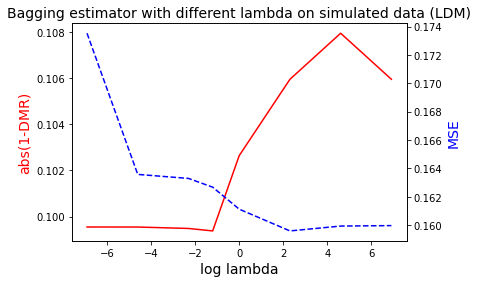

In [54]:
fig,ax = plt.subplots()
# make a plot
sns.lineplot(data=df, x='log_lambda', y='abs(1-DMR)', color='r')

#ax.fill_between(df['log_lambda'], df['abs(1-MLF)_25'],  df['abs(1-MLF)_75'], color='r',alpha=0.2)
# set x-axis label
ax.set_xlabel("log lambda",fontsize=14)
# set y-axis label
ax.set_ylabel("abs(1-DMR)",color="r",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
sns.lineplot(df.log_lambda, df.MSE,color="b",  linestyle='--')
#ax2.fill_between(df['log_lambda'], df['MSE_25'],  df['MSE_75'], color='b',alpha=0.2)
ax2.set_ylabel("MSE",color="b",fontsize=14)
plt.title('Bagging estimator with different lambda on simulated data (LDM)',fontsize=14)
plt.show()

In [42]:
df_basic = pd.read_csv('simu_LDM_basic_2.csv')
df_basic.columns = ['Unnamed: 0', 'abs(1-DI)', 'abs(1-MLF)', 'abs(1-DMR)', 'MSE',
       'abs(1-DI)_10', 'abs(1-MLF)_10', 'abs(1-DMR)_10', 'MSE_10',
       'abs(1-DI)_90', 'abs(1-MLF)_90', 'abs(1-DMR)_90', 'MSE_90']

df_hardt = pd.read_csv('simu_LDM_hardt.csv')
df_agarwal = pd.read_csv('simu_LDM_agarwal.csv')
df_combine = pd.read_csv('simu_LDM.csv')
# df_combine.columns = ['Unnamed: 0', 'abs(1-DI)', 'abs(1-MLF)', 'abs(1-DMR)', 'MSE', 'lambda',
#        'abs(1-DI)_10', 'abs(1-MLF)_10', 'abs(1-DMR)_10', 'MSE_10',
#        'abs(1-DI)_90', 'abs(1-MLF)_90', 'abs(1-DMR)_90', 'MSE_90']
#df_grid = pd.read_csv('compas_LDM_discr_grid.csv')
#df_discr = pd.read_csv('german_LDM_discr_perc.csv')

#df_basic['MSE'] = df_basic['RMSE']**2
#df_basic['abs(1-MLF)'] = abs(1-df_basic['MLF_beta'])

df_agarwal['MSE'] = df_agarwal['RMSE']**2
df_agarwal['abs(1-DMR)'] = abs(1-df_agarwal['DMR_gamma'])

df_hardt['MSE'] = df_hardt['RMSE']**2
df_hardt['abs(1-DMR)'] = abs(1-df_hardt['DMR_gamma'])

df_combine['MSE'] = df_combine['MSE_discr']
df_combine['log_lambda'] = np.log(df_combine['lambda'])
df_combine['abs(1-DMR)'] = abs(1-df_combine['DMR_gamma'])
df_combine = df_combine.sort_values(by=['log_lambda'])

# df_grid['MSE'] = df_grid['RMSE']**2
# df_grid['log_lambda'] = np.log(df_grid['lambda'])
# df_grid['abs(1-DI)'] = abs(1-df_grid['DI_alpha'])
# df_grid = df_grid.sort_values(by=['log_lambda'])

# df_discr['MSE'] = df_discr['RMSE']**2
# df_discr['log_lambda'] = np.log(df_discr['lambda'])
# df_discr['abs(1-DMR)'] = abs(1-df_discr['DMR_gamma'])
# df_discr = df_discr.sort_values(by=['log_lambda'])

In [40]:
df_combine = pd.read_csv('simu_LDM.csv')
df_combine

Unnamed: 0  DI_alpha  MLF_beta  DMR_gamma  MSE_discr  MSE_smooth    lambda  \
0           1  0.462502  0.757572   0.998104   0.163767    0.146329     0.001   
1           2  0.462539  0.757559   0.998121   0.163617    0.146347     0.010   
2           3  0.460765  0.757263   0.997624   0.163300    0.145761     0.100   
3           4  0.456936  0.756727   0.999679   0.161800    0.146786     0.300   
4           5  0.431937  0.745552   0.998650   0.160150    0.139500     1.000   
5           6  0.410833  0.732133   0.995729   0.158967    0.138718    10.000   
6           7  0.416255  0.734336   0.989581   0.159333    0.139819   100.000   
7           8  0.424783  0.737649   0.991579   0.159683    0.138668  1000.000   

   std_DI_alpha  std_MLF_beta  std_DMR_gamma  std_MSE_discr  std_MSE_smooth  \
0      0.018771      0.008857       0.014094       0.001420        0.002752   
1      0.018791      0.008850       0.014094       0.001403        0.002761   
2      0.018330      0.008615       0.014118       0.001380        0.002777   
3      0.019207      0.008814       0.014007       0.001500        0.002799   
4      0.013423      0.006359       0.014129       0.001453        0.001799   
5      0.014102      0.006555       0.014530       0.001376        0.001596   
6      0.014243      0.007013       0.014944       0.001445        0.001813   
7      0.011885      0.006189       0.014691       0.001450        0.001546   

   std_lambda  
0           0  
1           0  
2           0  
3           0  
4           0  
5           0  
6           0  
7           0

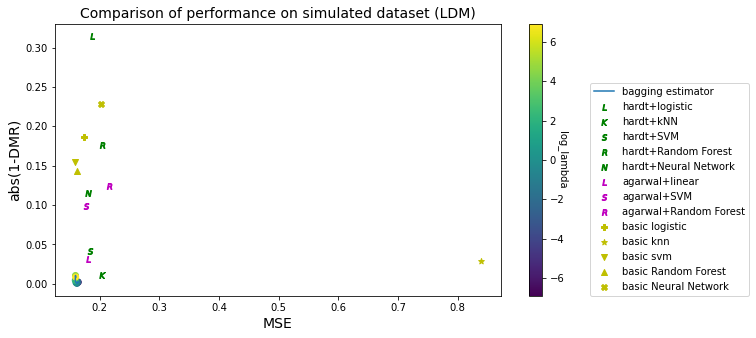

In [43]:
plt.figure(figsize=(10,5))
#combined predictor
plt.scatter(df_combine['MSE'], df_combine['abs(1-DMR)'], c=df_combine['log_lambda'])
plt.plot(df_combine['MSE'], df_combine['abs(1-DMR)'], label='bagging estimator')
cbar = plt.colorbar()
cbar.set_label('log_lambda',rotation= -90, fontsize=10)

#grid combined predictor
# plt.scatter(df_grid['MSE'], df_grid['abs(1-DI)'], c=df_grid['log_lambda'])
# plt.plot(df_grid['MSE'], df_grid['abs(1-DI)'], label='combined estimator with brut force')

# #grid combined predictor
# plt.scatter(df_discr['MSE'], df_discr['abs(1-DMR)'], c=df_discr['log_lambda'])
# plt.plot(df_discr['MSE'], df_discr['abs(1-DMR)'], label='combined estimator with discret test')
#cbar = plt.colorbar()
#cbar.set_label('log_lambda',rotation= -90, fontsize=10)

#hardt predictors
plt.scatter(df_hardt.loc[0,'MSE'], df_hardt.loc[0,'abs(1-DMR)'], marker='$L$', c='g', label='hardt+'+df_hardt.loc[0,'estimator'])
plt.scatter(df_hardt.loc[1,'MSE'], df_hardt.loc[1,'abs(1-DMR)'], marker='$K$', c='g',label='hardt+'+df_hardt.loc[1,'estimator'])
plt.scatter(df_hardt.loc[2,'MSE'], df_hardt.loc[2,'abs(1-DMR)'], marker='$S$', c='g',label='hardt+'+df_hardt.loc[2,'estimator'])
plt.scatter(df_hardt.loc[3,'MSE'], df_hardt.loc[3,'abs(1-DMR)'], marker='$R$', c='g',label='hardt+'+df_hardt.loc[3,'estimator'])
plt.scatter(df_hardt.loc[4,'MSE'], df_hardt.loc[4,'abs(1-DMR)'], marker='$N$', c='g',label='hardt+'+df_hardt.loc[4,'estimator'])

#agarwal predictors
plt.scatter(df_agarwal.loc[0,'MSE'], df_agarwal.loc[0,'abs(1-DMR)'], marker='$L$', c='m', label='agarwal+'+df_agarwal.loc[0,'estimator'])
plt.scatter(df_agarwal.loc[1,'MSE'], df_agarwal.loc[1,'abs(1-DMR)'], marker='$S$', c='m',label='agarwal+'+df_agarwal.loc[1,'estimator'])
plt.scatter(df_agarwal.loc[2,'MSE'], df_agarwal.loc[2,'abs(1-DMR)'], marker='$R$', c='m',label='agarwal+'+df_agarwal.loc[2,'estimator'])

#basic predictors
plt.scatter(df_basic.loc[0,'MSE'], df_basic.loc[0,'abs(1-DMR)'], marker='P', c='y', label='basic logistic')
plt.scatter(df_basic.loc[1,'MSE'], df_basic.loc[1,'abs(1-DMR)'], marker='*', c='y',label='basic knn')
plt.scatter(df_basic.loc[2,'MSE'], df_basic.loc[2,'abs(1-DMR)'], marker='v', c='y',label='basic svm')
plt.scatter(df_basic.loc[3,'MSE'], df_basic.loc[3,'abs(1-DMR)'], marker='^', c='y',label='basic Random Forest')
plt.scatter(df_basic.loc[4,'MSE'], df_basic.loc[4,'abs(1-DMR)'], marker='X', c='y',label='basic Neural Network')


plt.ylabel('abs(1-DMR)',fontsize=14)
plt.xlabel('MSE',fontsize=14)
plt.legend(loc=(1.2,0))
plt.title('Comparison of performance on simulated dataset (LDM)',fontsize=14);